<a href="https://colab.research.google.com/github/EvansKunchu/NLP-Learning-Path/blob/main/IMDB_subworks_8k_with_SL_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY82XPN/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY82XPN/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY82XPN/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Let's now prepare the data set for  the model

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE =256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the dataset to the maximum lenght of the sequence
train_dataset= train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

Time to build and compile the model for the IMDB subworks 8k LSTM dataset


In [15]:
import tensorflow as tf
# Hperperparameters definition
embedding_dim = 64
lstm_dim = 64
dense_dim = 64
#Build the model

model = tf.keras.Sequential ([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598209 (2.28 MB)
Trainable params: 598209 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics =['accuracy'])

Now that the model has been built, it is time to train it. Note that the bidirectional functions is empolyed to induce a feedforward mechanism and it implemets the Recurrent neural networks (RNN )as an LSTM

In [18]:
num_epoch = 10
history = model.fit(train_dataset, epochs= num_epoch, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 1116s 11s/step - loss: 0.5663 - accuracy: 0.6882 - val_loss: 0.4515 - val_accuracy: 0.7984
Epoch 2/10
98/98 [==============================] - 1110s 11s/step - loss: 0.3219 - accuracy: 0.8728 - val_loss: 0.3651 - val_accuracy: 0.8470
Epoch 3/10
98/98 [==============================] - 1118s 11s/step - loss: 0.2498 - accuracy: 0.9068 - val_loss: 0.3704 - val_accuracy: 0.8514
Epoch 4/10
98/98 [==============================] - 1128s 12s/step - loss: 0.2078 - accuracy: 0.9247 - val_loss: 0.4127 - val_accuracy: 0.8418
Epoch 5/10
98/98 [==============================] - 1119s 11s/step - loss: 0.1875 - accuracy: 0.9324 - val_loss: 0.4528 - val_accuracy: 0.8374
Epoch 6/10
98/98 [==============================] - 1110s 11s/step - loss: 0.1505 - accuracy: 0.9474 - val_loss: 0.4566 - val_accuracy: 0.8192
Epoch 7/10
98/98 [==============================] - 1121s 11s/step - loss: 0.1308 - accuracy: 0.9552 - val_loss: 0.4926 - val_accuracy: 0.8322

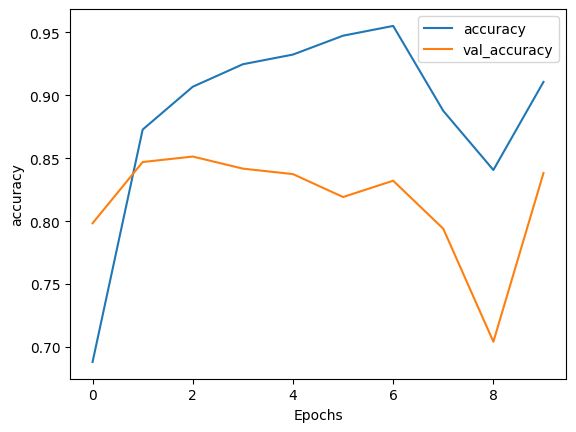

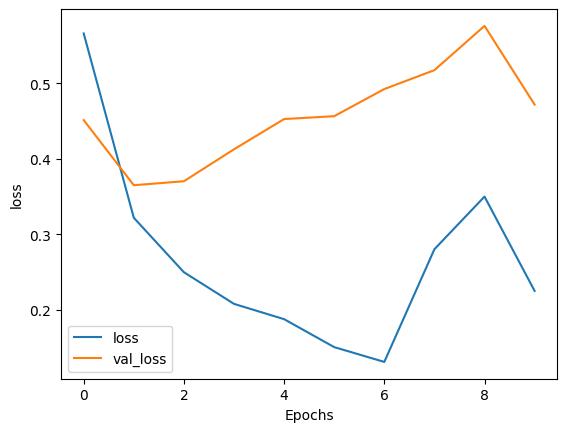

In [22]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")